In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('C:/Users/71477/OneDrive - PT. Federal International Finance/External Class Training/Data Analytics/SuperStore_Orders.csv/SuperStore_Orders.csv',encoding='latin1')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [27]:
# Mengubah nama kolom untuk kemudahan, terutama jika ada spasi
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Pastikan kolom-kolom yang relevan ada setelah perubahan nama
required_columns = ['sales', 'quantity', 'discount', 'category', 'profit']
if not all(col in df.columns for col in required_columns):
    print(f"\nKesalahan: Beberapa kolom yang diperlukan tidak ditemukan setelah penamaan ulang. Pastikan dataset Anda memiliki kolom berikut: {required_columns}")
    exit()

print(f"\nKolom yang akan digunakan: {required_columns}")


Kolom yang akan digunakan: ['sales', 'quantity', 'discount', 'category', 'profit']


In [30]:
# --- 2. Pembersihan dan Pra-pemrosesan Data ---

# Identifikasi fitur numerik dan kategorikal
numerical_features = ['sales', 'quantity', 'discount']
categorical_features = ['category']
target = 'profit'

# Periksa nilai yang hilang
print("\nJumlah nilai hilang per kolom:")
print(df[numerical_features + categorical_features + [target]].isnull().sum())

# Buat pipeline pra-pemrosesan
# 'StandardScaler' untuk fitur numerik agar memiliki skala yang seragam
# 'OneHotEncoder' untuk fitur kategorikal agar diubah menjadi representasi numerik (kolom biner)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) #data object diubah jadi numerik
    ])

# Pisahkan fitur (X) dan target (y)
X = df[numerical_features + categorical_features]
y = df[target]

# --- 3. Pembagian Data ---
# Bagi dataset menjadi data pelatihan (80%) dan data pengujian (20%)
# random_state=42 memastikan hasil pembagian yang konsisten setiap kali Anda menjalankan kode
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nUkuran data pelatihan (fitur): {X_train.shape}")
print(f"Ukuran data pengujian (fitur): {X_test.shape}")
print(f"Ukuran data pelatihan (target): {y_train.shape}")
print(f"Ukuran data pengujian (target): {y_test.shape}")


Jumlah nilai hilang per kolom:
sales       0
quantity    0
discount    0
category    0
profit      0
dtype: int64

Ukuran data pelatihan (fitur): (41032, 4)
Ukuran data pengujian (fitur): (10258, 4)
Ukuran data pelatihan (target): (41032,)
Ukuran data pengujian (target): (10258,)


In [35]:
#Terdapat angka yang tersimpan sebagai string sehingga tidak dapat diproses
columns_to_clean = ['sales', 'discount', 'profit'] # Tambahkan kolom lain jika ada yang serupa
for col in columns_to_clean:
    if col in df.columns and df[col].dtype == 'object': # Hanya proses jika tipe datanya string/object
        print(f"Membersihkan kolom '{col}' dari koma desimal dan mengonversinya ke numerik...")
        # Ganti koma dengan titik, lalu konversi ke float
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce') # 'coerce' akan mengubah nilai yang tidak bisa dikonversi menjadi NaN

Membersihkan kolom 'sales' dari koma desimal dan mengonversinya ke numerik...


In [36]:
print("\nJumlah nilai hilang setelah konversi:")
print(df[columns_to_clean].isnull().sum())

# --- Lanjutkan dengan Pra-pemrosesan Data yang Sudah Ada ---

# Identifikasi fitur numerik dan kategorikal
numerical_features = ['sales', 'quantity', 'discount']
categorical_features = ['category']
target = 'profit'

# Periksa nilai yang hilang
print("\nJumlah nilai hilang per kolom (setelah pembersihan):")
print(df[numerical_features + categorical_features + [target]].isnull().sum())

# Buat pipeline pra-pemrosesan
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Pisahkan fitur (X) dan target (y)
X = df[numerical_features + categorical_features]
y = df[target]



Jumlah nilai hilang setelah konversi:
sales       0
discount    0
profit      0
dtype: int64

Jumlah nilai hilang per kolom (setelah pembersihan):
sales       0
quantity    0
discount    0
category    0
profit      0
dtype: int64


In [37]:
# --- 3. Pembagian Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nUkuran data pelatihan (fitur): {X_train.shape}")
print(f"Ukuran data pengujian (fitur): {X_test.shape}")
print(f"Ukuran data pelatihan (target): {y_train.shape}")
print(f"Ukuran data pengujian (target): {y_test.shape}")


Ukuran data pelatihan (fitur): (41032, 4)
Ukuran data pengujian (fitur): (10258, 4)
Ukuran data pelatihan (target): (41032,)
Ukuran data pengujian (target): (10258,)


In [38]:
# --- 4. Pemilihan dan Pelatihan Model Regresi ---

# Model 1: Regresi Linier (Linear Regression)
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

print("\nMelatih Model Regresi Linier...")
model_lr.fit(X_train, y_train)
print("Model Regresi Linier selesai dilatih.")

# Model 2: Random Forest Regressor
model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

print("\nMelatih Model Random Forest Regressor (mungkin butuh waktu lebih lama)...")
model_rf.fit(X_train, y_train)
print("Model Random Forest Regressor selesai dilatih.")




Melatih Model Regresi Linier...
Model Regresi Linier selesai dilatih.

Melatih Model Random Forest Regressor (mungkin butuh waktu lebih lama)...
Model Random Forest Regressor selesai dilatih.


In [39]:
# --- 5. Evaluasi Model ---

def evaluate_model(model, X_test, y_test, model_name):
    """Fungsi untuk mengevaluasi model regresi dan mencetak hasilnya."""
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- Evaluasi {model_name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    # Visualisasi Prediksi vs Aktual
    plt.figure(figsize=(10, 6))
    sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
    plt.xlabel("Keuntungan Aktual")
    plt.ylabel("Keuntungan Prediksi")
    plt.title(f"Keuntungan Aktual vs. Prediksi ({model_name})")
    plt.grid(True)
    plt.show()



--- Evaluasi Regresi Linier ---
Mean Absolute Error (MAE): 71.20
Mean Squared Error (MSE): 29239.27
Root Mean Squared Error (RMSE): 170.99
R-squared (R2): 0.11


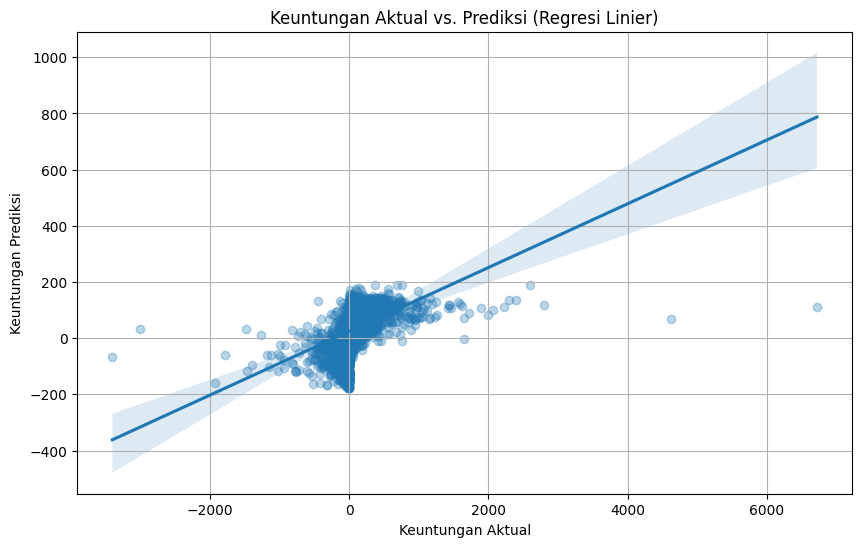


--- Evaluasi Random Forest Regressor ---
Mean Absolute Error (MAE): 37.23
Mean Squared Error (MSE): 16446.88
Root Mean Squared Error (RMSE): 128.25
R-squared (R2): 0.50


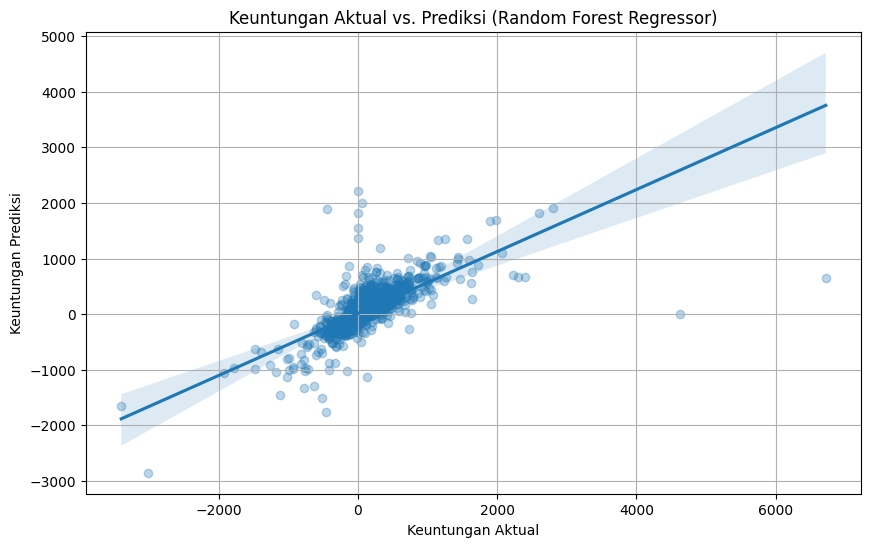


--- Contoh Prediksi Keuntungan Baru ---

Data input baru:
   sales  quantity  discount         category
0    250         2      0.10  Office Supplies
1   1000         5      0.00       Technology
2     50         1      0.20        Furniture
3   5000        10      0.05        Furniture

Prediksi Keuntungan (menggunakan Random Forest): [  3.46 229.11  -1.99 168.08]
Prediksi Keuntungan (menggunakan Regresi Linier): [  9.61  89.78   6.07 -31.66]


In [40]:
# Evaluasi Model Regresi Linier
evaluate_model(model_lr, X_test, y_test, "Regresi Linier")

# Evaluasi Model Random Forest Regressor
evaluate_model(model_rf, X_test, y_test, "Random Forest Regressor")

# --- Contoh Penggunaan Model untuk Prediksi Baru ---
print("\n--- Contoh Prediksi Keuntungan Baru ---")
new_data = pd.DataFrame({
    'sales': [250, 1000, 50, 5000],
    'quantity': [2, 5, 1, 10],
    'discount': [0.1, 0.0, 0.2, 0.05],
    'category': ['Office Supplies', 'Technology', 'Furniture', 'Furniture']
})

print("\nData input baru:")
print(new_data)

predicted_profit_rf = model_rf.predict(new_data)
print(f"\nPrediksi Keuntungan (menggunakan Random Forest): {predicted_profit_rf.round(2)}")

predicted_profit_lr = model_lr.predict(new_data)
print(f"Prediksi Keuntungan (menggunakan Regresi Linier): {predicted_profit_lr.round(2)}")